##  Solow Growth Model
Formulas copied from https://raw.githubusercontent.com/braddelong/LS2019/master/2019-08-08-Sargent-Stachurski.ipynb

Factor accumulation:

>(1) $ \frac{dL_t}{dt} = nL_t $

>(2) $ \frac{dE_t}{dt} = gE_t $

>(3) $ \frac{dK_t}{dt} = sY_t - δK_t $

Production function:

>(4) $ Y_t = K_t^α(L_tE_t)^{(1-α)} $

Definition of capital-output ratio:

>(5) $ κ_t = \frac{K_t}{Y_t} $

Solving for the rate of change of the capital-output ratio:

>(6) $ Y_t = κ_t^{(α/(1-α))}(L_tE_t) $

>(7) $ \frac{1}{K_t}\frac{dK_t}{dt} = \frac{s}{κ_t} - δ $

>(8) $ \frac{1}{Y_t}\frac{dY_t}{dt} = α \left( \frac{1}{K_t}\frac{dK_t}{dt} \right) + (1-α)(n+g) $

>(9) $ \frac{1}{κ_t}\frac{dκ_t}{dt} = \frac{1}{K_t}\frac{dK_t}{dt} - α \left( \frac{1}{K_t}\frac{dK_t}{dt} \right) - (1-α)(n+g) $

>(10) $ \frac{1}{κ_t}\frac{dκ_t}{dt} =  (1- α) \left( \frac{1}{K_t}\frac{dK_t}{dt}  \right) - (1-α)(n+g) $

>(11) $ \frac{1}{κ_t}\frac{dκ_t}{dt} =  (1- α) \left( \frac{s}{κ_t} - δ  \right) - (1-α)(n+g) $

>(12) $ \frac{dκ_t}{dt} =  (1- α) \left( s - (n+g+δ)κ_t  \right) $

Integrating:

>(13) $ κ_t = \frac{s}{n+g+δ} + e^{-(1-α)(n+g+δ)t} \left[ κ_0 - \frac{s}{n+g+δ}  \right]   $

# The code below runs the model from t = 0 to 100 and saves the values into an array, so that they may be plotted later

In [10]:
# Install packages
!pip install numpy matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Defining the constants for the simulation
DELTA=0.1
alpha = .333
g = 0.02
n = 0.02
s = 0.15
delta = 0.04

def gen_values(alpha, g, n, s, delta, BASE = 100, shock = None):
    # Initializing base values for A and L to the BASE parameter
    A_zero = BASE
    L_zero = BASE

    # Defining the function for economic output (Y) as a function of capital (K), labor (L), and technology (A)
    # using the Cobb-Douglas production function
    Y = lambda K,L,A: K**alpha * (A * L) **(1-alpha)

    # Defining the functions to calculate the exponential growth of technology (A) and labor (L) over time (t)
    A = lambda t: A_zero * math.exp(t * g)
    L = lambda t: L_zero * math.exp(t * n)

    # Defining the function to calculate the change in capital over time, based on the current level of capital,
    # the savings rate, and the growth rates of technology and labor
    k_dot = lambda K,t: s * Y(K,L(t),A(t)) - (g + n + delta) * K

    # Initializing lists to store the values of different variables at each time step
    points = []
    t = 0
    t_values = []
    k_values = []
    a_values = []
    l_values = []
    y_values = []
    little_k_values = []
    little_y_values = []
    investment_values = []
    little_investment_values = []
    breakeven_values = []
    little_breakeven_values = []
    kdot_values = []

    # Initializing the starting value for capital
    k = BASE

    # Loop to simulate the evolution of the economy over time
    while t < 100:
        # Applying shocks to the system at a specified time, changing one or more parameters
        if shock and t > shock['time']:
            if 's' in shock:
                s = shock['s']
            if 'g' in shock:
                g = shock['g']
            if 'n' in shock:
                n = shock['n']
            if 'delta' in shock:
                delta = shock['delta']
            shock = None

        # Calculating the current economic output and appending the current values of all variables to their respective lists
        y = Y(k,L(t),A(t))
        t_values.append(t)
        k_values.append(k)
        y_values.append(y)
        investment_values.append(s * y)
        breakeven_values.append(delta * k)
        a_values.append(A(t))
        l_values.append(L(t))
        _k_dot = k_dot(k,t)

        # Calculating and storing per capita values (indicated by the "little" prefix)
        little_k_values.append(k/(L(t)*A(t)))
        little_y_values.append(y/(L(t)*A(t)))
        little_investment_values.append(s * y/(L(t)*A(t)))
        little_breakeven_values.append(delta * k/(L(t)*A(t)))
        kdot_values.append(_k_dot)

        # Updating the capital stock and time for the next iteration
        k += _k_dot * DELTA
        t += DELTA

    # Returning a dictionary containing all the simulated data
    return {
        'k': k_values,
        'kdot': kdot_values,
        'y': y_values,
        't': t_values,
        'a': a_values,
        'l': l_values,
        '_k': little_k_values,
        '_y': little_y_values,
        'investment': investment_values,
        '_investment': little_investment_values,
        'breakeven': breakeven_values,
        '_breakeven': little_breakeven_values,
    }


To plot a shock, pass shock parameter as a dictionary containing the following:

```
{
    'time': t between 0 and 100, 
    's': new value for s,
    'g': new value for g,
    'n': new value for n,
    'delta': new value for delta
}
```

You can shock a single variable or any combinations

# This is the example of plotting a shock in investment at t=20:

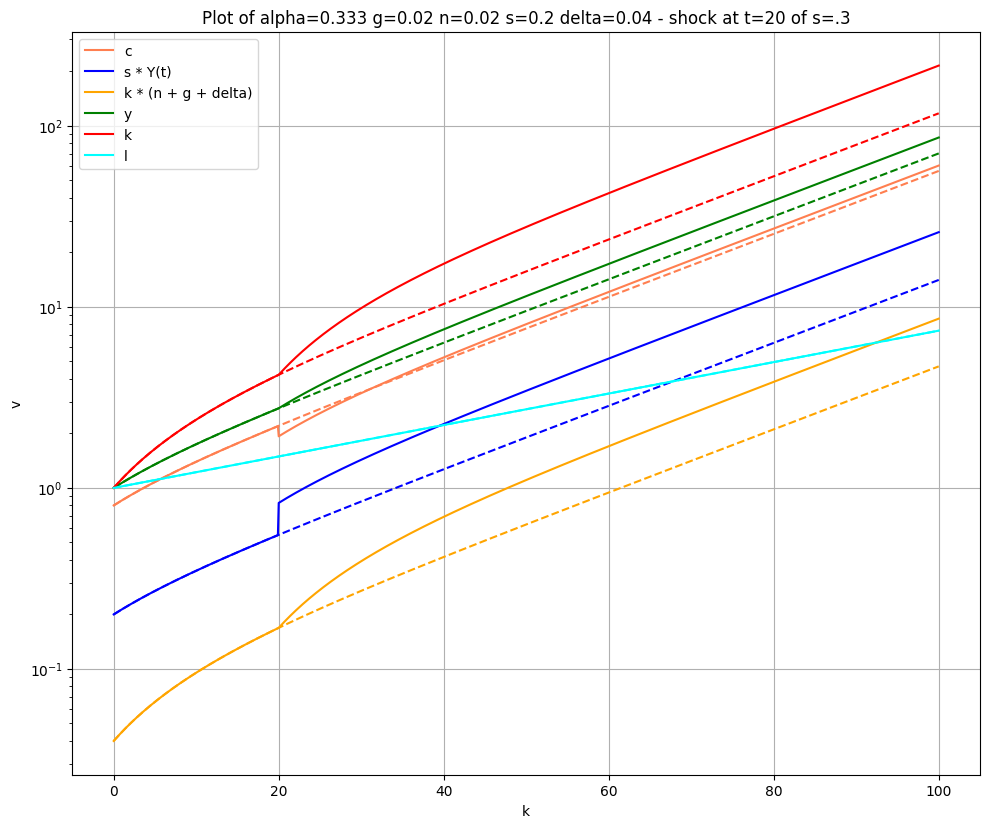

In [12]:
values_new = gen_values(alpha, g=.02, n=.02, s=.2, delta=.04, BASE=1)
values = gen_values(alpha, g=.02, n=.02, s=.2, delta=.04, BASE=1, shock={'time': 20, 's': .3})

plt.figure(figsize=(10, 40))
plt.subplot(5, 1, 1)
plt.yscale('log')

# Plotting charts without shocks (original reference, dashed lines)
plt.plot(values_new['t'], [i[0] - i[1] for i in zip(values_new['y'], values_new['investment'])], linestyle='--', color='coral')
plt.plot(values_new['t'], values_new['investment'], linestyle='--', color='blue')
plt.plot(values_new['t'], values_new['breakeven'], linestyle='--', color='orange')
plt.plot(values_new['t'], values_new['y'], linestyle='--', color='green')
plt.plot(values_new['t'], values_new['k'], linestyle='--', color='red')
plt.plot(values_new['t'], values_new['l'], linestyle='--', color='cyan')

# Plotting charts with shocks (solid lines)
plt.plot(values['t'], [i[0] - i[1] for i in zip(values['y'], values['investment'])], label='c', color='coral')
plt.plot(values['t'], values['investment'], label='s * Y(t)', color='blue')
plt.plot(values['t'], values['breakeven'], label='k * (n + g + delta)', color='orange')
plt.plot(values['t'], values['y'], label='y', color='green')
plt.plot(values['t'], values['k'], label='k', color='red')
plt.plot(values['t'], values['l'], label='l', color='cyan')

# Labels, title, legend, and grid
plt.title(f'Plot of alpha={alpha} g={.02} n={.02} s={.2} delta={.04} - shock at t=20 of s=.3')
plt.xlabel('k')
plt.ylabel('v')
plt.grid(True)
plt.legend()

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()


# Chart of intensive form of production function with a shock investment

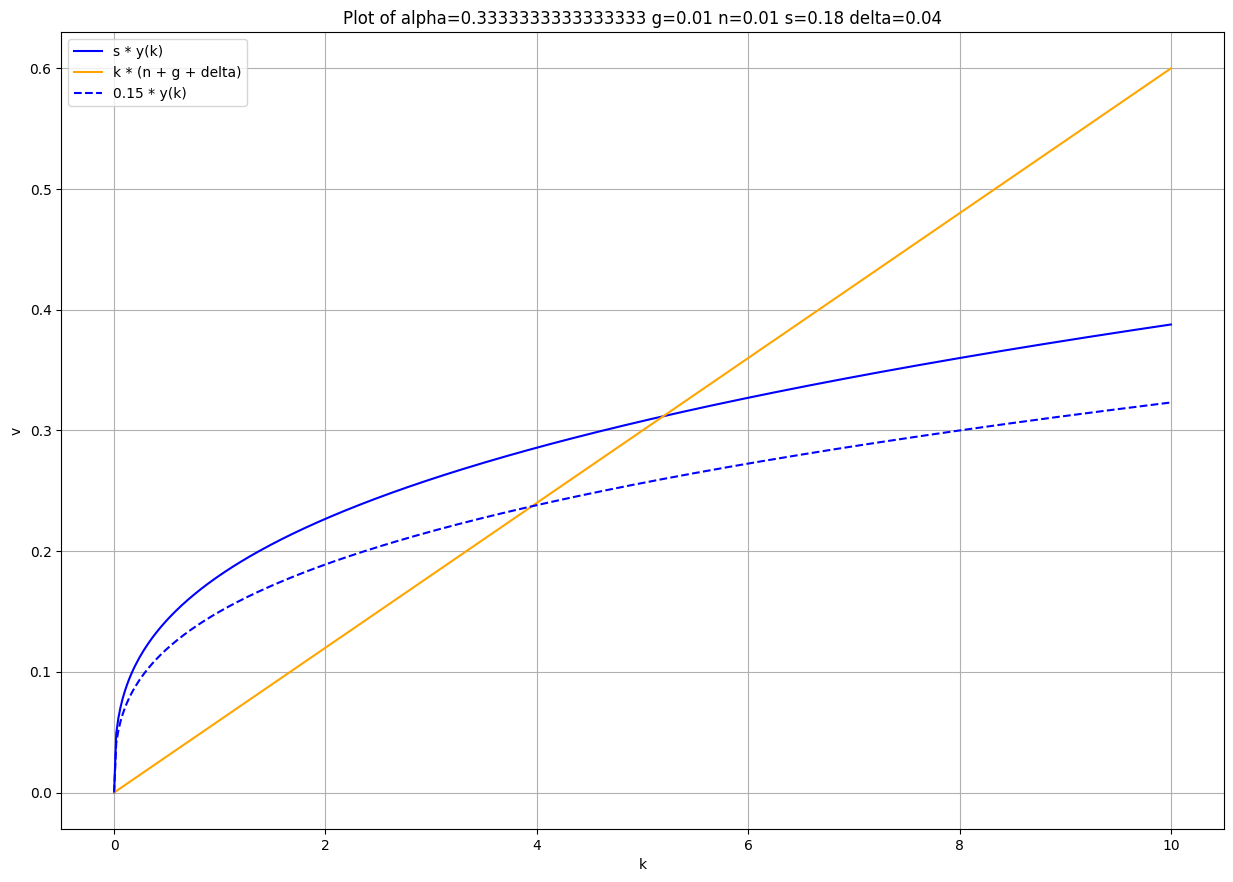

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
from IPython.display import HTML

# Model parameters
alpha = 1/3
n = .01
g = .01
delta = .04
INITIAL_S = .15
TARGET_S = .18 # Ending s value
s = .18
k_values = np.linspace(0, 10, 500) # X axis values
y_values = [s * (k**alpha) for k in k_values] # This is the s * Y(K) series
breakeven_values = [k * (n + g + delta) for k in k_values] # This is break-even series
# Plot dashed line
y_values_dashed = [INITIAL_S * (k**alpha) for k in k_values] # This is the s * Y(K) series

plt.figure(figsize=(15, 60))
plt.subplot(5, 1, 1)
# Plot chart
plt.plot(k_values, y_values, label='s * y(k)', color='blue')
plt.plot(k_values, breakeven_values, label='k * (n + g + delta)', color='orange')
plt.plot(k_values, y_values_dashed, label=f'{INITIAL_S:.2} * y(k)', linestyle='--', color='blue')
plt.title(f'Plot of alpha={alpha} g={g} n={n} s={s:.2f} delta={delta}')
plt.xlabel('k')
plt.ylabel('v')
plt.grid(True)
plt.legend()


In [15]:
pip install pillow



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Animated version
![](https://github.com/deodoro/macro_models/blob/main/solow.gif?raw=true)

Code:

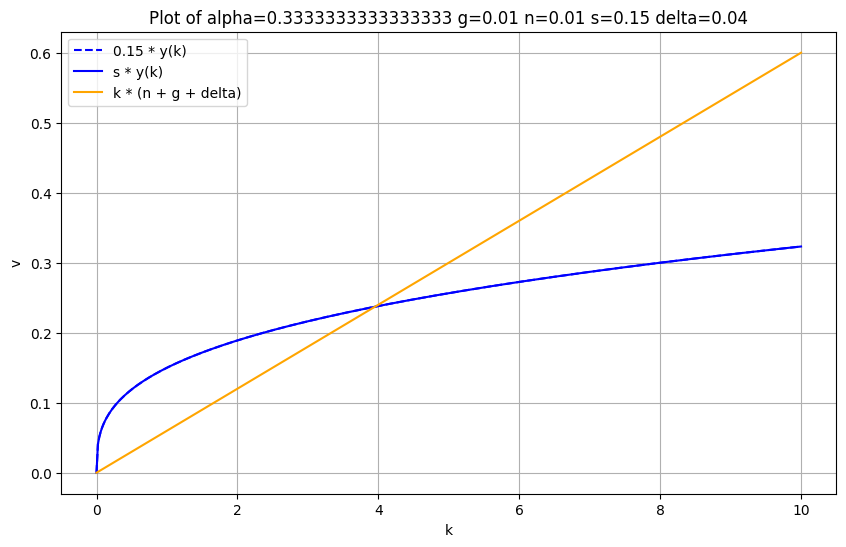

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
from IPython.display import HTML
from IPython.display import Image

# Model parameters
alpha = 1/3
n = .01
g = .01
delta = .04

# Animation parameters
INITIAL_S = .15 # Starting s value
TARGET_S = .18 # Ending s value
NUM_FRAMES = 15 # Quantity of frames (= length of animation)

def update(frame):
    # Clear the previous frame
    plt.clf()
    s = INITIAL_S + frame * (TARGET_S - INITIAL_S) / NUM_FRAMES  # Increment s value with each frame
    k_values = np.linspace(0, 10, 500) # X axis values
    y_values = [s * (k**alpha) for k in k_values] # This is the s * Y(K) series
    breakeven_values = [k * (n + g + delta) for k in k_values] # This is break-even series

    # Plot dashed line
    y_values_dashed = [INITIAL_S * (k**alpha) for k in k_values] # This is the s * Y(K) series
    plt.plot(k_values, y_values_dashed, label=f'{INITIAL_S:.2} * y(k)', linestyle='--', color='blue')

    # Plot new frame
    plt.plot(k_values, y_values, label='s * y(k)', color='blue')
    plt.plot(k_values, breakeven_values, label='k * (n + g + delta)', color='orange')

    plt.title(f'Plot of alpha={alpha} g={g} n={n} s={s:.2f} delta={delta}')
    plt.xlabel('k')
    plt.ylabel('v')
    plt.grid(True)
    plt.legend()

# Set up the initial plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set up the animation
ani = FuncAnimation(fig, update, frames=range(NUM_FRAMES), repeat=True)

# Saving the video
ani.save('solow.gif', writer='pillow')

# Display HTML video of the animation
# HTML(ani.to_jshtml())